Tutorial of different types of calendar supported in `s2s` package.

In [1]:
import numpy as np
import pandas as pd
import s2spy.time

Tutorial of `MonthlyCalendar` module in `s2s` package.

Create MonthlyCalendar instance.

In [2]:
calendar = s2spy.time.MonthlyCalendar(anchor="04-12", freq='2M', n_targets=1)
calendar

MonthlyCalendar(freq=2M, n_targets=1)

Map the calendar to years.

In [3]:
calendar = calendar.map_years(2020, 2021)
calendar.show()

i_interval,-5,-4,-3,-2,-1,1
anchor_year,,,,,,
2021,"[2020 Jun, 2020 Aug)","[2020 Aug, 2020 Oct)","[2020 Oct, 2020 Dec)","[2020 Dec, 2021 Feb)","[2021 Feb, 2021 Apr)","[2021 Apr, 2021 Jun)"
2020,"[2019 Jun, 2019 Aug)","[2019 Aug, 2019 Oct)","[2019 Oct, 2019 Dec)","[2019 Dec, 2020 Feb)","[2020 Feb, 2020 Apr)","[2020 Apr, 2020 Jun)"


Tutorial of `WeeklyCalendar` module in `s2s` package.

Create WeeklyCalendar instance.

In [4]:
calendar = s2spy.time.WeeklyCalendar(anchor="W10", freq='3W', n_targets=1)
calendar

WeeklyCalendar(freq=3W, n_targets=1)

Map the calendar to years.

In [5]:
calendar = calendar.map_years(2020, 2021)
calendar.show()

i_interval,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,1
anchor_year,,,,,,,,,,,,,,,,,
2021,"[2020-W14, 2020-W17)","[2020-W17, 2020-W20)","[2020-W20, 2020-W23)","[2020-W23, 2020-W26)","[2020-W26, 2020-W29)","[2020-W29, 2020-W32)","[2020-W32, 2020-W35)","[2020-W35, 2020-W38)","[2020-W38, 2020-W41)","[2020-W41, 2020-W44)","[2020-W44, 2020-W47)","[2020-W47, 2020-W50)","[2020-W50, 2021-W01)","[2021-W01, 2021-W04)","[2021-W04, 2021-W07)","[2021-W07, 2021-W10)","[2021-W10, 2021-W13)"
2020,"[2019-W14, 2019-W17)","[2019-W17, 2019-W20)","[2019-W20, 2019-W23)","[2019-W23, 2019-W26)","[2019-W26, 2019-W29)","[2019-W29, 2019-W32)","[2019-W32, 2019-W35)","[2019-W35, 2019-W38)","[2019-W38, 2019-W41)","[2019-W41, 2019-W44)","[2019-W44, 2019-W47)","[2019-W47, 2019-W50)","[2019-W50, 2020-W01)","[2020-W01, 2020-W04)","[2020-W04, 2020-W07)","[2020-W07, 2020-W10)","[2020-W10, 2020-W13)"


Tutorial of `CustomCalendar` module in `s2s` package.

Create CustomCalendar instance.

In [6]:
# create custom calendar
calendar = s2spy.time.CustomCalendar(anchor="12-31")
print(calendar)

CustomCalendar(n_targets=0)


Create target periods and precursor periods as building blocks.

In [7]:
# create target periods
target_1 = s2spy.time.TargetPeriod("20d")
target_2 = s2spy.time.TargetPeriod("20d", "10d")
# create precursor periods
precursor_1 = s2spy.time.PrecursorPeriod("10d", "10d")
precursor_2 = s2spy.time.PrecursorPeriod("10d", "-5d")
precursor_3 = s2spy.time.PrecursorPeriod("10d")

Append building blocks to form calendar.

In [8]:
# append building blocks to calendar object
calendar.append(target_1)
calendar.append(target_2)
calendar.append(precursor_1)
calendar.append(precursor_2)
calendar.append(precursor_3)

Map the calendar to multiple years (start year - end year).

In [9]:
calendar = calendar.map_years(2020, 2022)
calendar.show()

i_interval,-3,-2,-1,1,2
anchor_year,,,,,
2022,"[2022-11-26, 2022-12-06)","[2022-12-06, 2022-12-16)","[2022-12-11, 2022-12-21)","[2022-12-31, 2023-01-20)","[2023-01-30, 2023-02-19)"
2021,"[2021-11-26, 2021-12-06)","[2021-12-06, 2021-12-16)","[2021-12-11, 2021-12-21)","[2021-12-31, 2022-01-20)","[2022-01-30, 2022-02-19)"
2020,"[2020-11-26, 2020-12-06)","[2020-12-06, 2020-12-16)","[2020-12-11, 2020-12-21)","[2020-12-31, 2021-01-20)","[2021-01-30, 2021-02-19)"


The calendar can also be displayed in a plot, using `.visualize()`.

This makes it easier to look at calendars containing more intervals:

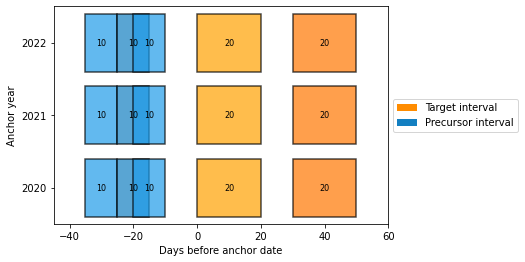

In [10]:
calendar.visualize(relative_dates=True, add_length=True)

Map the calendar to the input data.

In [11]:
# create dummy data for testing
time_index = pd.date_range('20171110', '20211211', freq='10d')
var = np.random.random(len(time_index))
# generate input data
test_data = pd.Series(var, index=time_index)
# map year to data
calendar = calendar.map_to_data(test_data)
calendar.show()

i_interval,-3,-2,-1,1,2
anchor_year,,,,,
2020,"[2020-11-26, 2020-12-06)","[2020-12-06, 2020-12-16)","[2020-12-11, 2020-12-21)","[2020-12-31, 2021-01-20)","[2021-01-30, 2021-02-19)"
2019,"[2019-11-26, 2019-12-06)","[2019-12-06, 2019-12-16)","[2019-12-11, 2019-12-21)","[2019-12-31, 2020-01-20)","[2020-01-30, 2020-02-19)"
2018,"[2018-11-26, 2018-12-06)","[2018-12-06, 2018-12-16)","[2018-12-11, 2018-12-21)","[2018-12-31, 2019-01-20)","[2019-01-30, 2019-02-19)"
2017,"[2017-11-26, 2017-12-06)","[2017-12-06, 2017-12-16)","[2017-12-11, 2017-12-21)","[2017-12-31, 2018-01-20)","[2018-01-30, 2018-02-19)"
